In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('planet-understanding-the-amazon-from-space/train_v2.csv/train_v2.csv')

In [124]:
df

,image_name,tags
0,train_0,haze primary
1,train_1,agriculture clear primary water
2,train_2,clear primary
3,train_3,clear primary
4,train_4,agriculture clear habitation primary road
...,...,...
40474,train_40474,clear primary
40475,train_40475,cloudy
40476,train_40476,agriculture clear primary
40477,train_40477,agriculture clear primary road


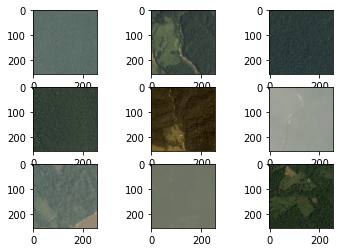

In [4]:

# plot the first 9 images in the planet dataset
from matplotlib import pyplot
from matplotlib.image import imread
# define location of dataset
folder = 'planet/train-jpg/'
# plot first few images
for i in range(9):
    # define subplot
    pyplot.subplot(330 + 1 + i)
    # define filename
    filename = folder + 'train_' + str(i) + '.jpg'
    # load image pixels
    image = imread(filename)
    # plot raw pixel data
    pyplot.imshow(image)
    # show the figure
pyplot.show()


In [5]:
df['tags'][1].split(' ')

['agriculture', 'clear', 'primary', 'water']

In [6]:

# create a set of labels
labels = set()
for i in range(len(df)):
    # convert spaced separated tags into an array of tags
    tags = df['tags'][i].split(' ')
    # add tags to the set of known labels
    labels.update(tags)


In [7]:
labels

{'agriculture',
 'artisinal_mine',
 'bare_ground',
 'blooming',
 'blow_down',
 'clear',
 'cloudy',
 'conventional_mine',
 'cultivation',
 'habitation',
 'haze',
 'partly_cloudy',
 'primary',
 'road',
 'selective_logging',
 'slash_burn',
 'water'}

In [8]:

# convert set of labels to a list to list
labels = list(labels)
# order set alphabetically
labels.sort()


In [9]:
labels

['agriculture',
 'artisinal_mine',
 'bare_ground',
 'blooming',
 'blow_down',
 'clear',
 'cloudy',
 'conventional_mine',
 'cultivation',
 'habitation',
 'haze',
 'partly_cloudy',
 'primary',
 'road',
 'selective_logging',
 'slash_burn',
 'water']

In [10]:

# dict that maps labels to integers, and the reverse
labels_map = {labels[i]:i for i in range(len(labels))}

In [11]:
labels_map

{'agriculture': 0,
 'artisinal_mine': 1,
 'bare_ground': 2,
 'blooming': 3,
 'blow_down': 4,
 'clear': 5,
 'cloudy': 6,
 'conventional_mine': 7,
 'cultivation': 8,
 'habitation': 9,
 'haze': 10,
 'partly_cloudy': 11,
 'primary': 12,
 'road': 13,
 'selective_logging': 14,
 'slash_burn': 15,
 'water': 16}

In [12]:
inv_labels_map = {i:labels[i] for i in range(len(labels))}

In [13]:
inv_labels_map

{0: 'agriculture',
 1: 'artisinal_mine',
 2: 'bare_ground',
 3: 'blooming',
 4: 'blow_down',
 5: 'clear',
 6: 'cloudy',
 7: 'conventional_mine',
 8: 'cultivation',
 9: 'habitation',
 10: 'haze',
 11: 'partly_cloudy',
 12: 'primary',
 13: 'road',
 14: 'selective_logging',
 15: 'slash_burn',
 16: 'water'}

In [14]:
def create_file_mapping(df):
    mapping = dict()
    for i in range(len(df)):
        name, tags = df['image_name'][i], df['tags'][i]
        mapping[name] = tags.split(' ')
    return mapping

In [15]:
file_mapping = create_file_mapping(df)

In [16]:
file_mapping = create_file_mapping(df)

In [17]:
# load and prepare planet dataset and save to file
from os import listdir
from numpy import zeros
from numpy import asarray
from numpy import savez_compressed
from pandas import read_csv
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array


In [18]:
folder = 'planet/train-jpg/'
listdir(folder)

['train_0.jpg',
 'train_1.jpg',
 'train_10.jpg',
 'train_100.jpg',
 'train_1000.jpg',
 'train_10000.jpg',
 'train_10001.jpg',
 'train_10002.jpg',
 'train_10003.jpg',
 'train_10004.jpg',
 'train_10005.jpg',
 'train_10006.jpg',
 'train_10007.jpg',
 'train_10008.jpg',
 'train_10009.jpg',
 'train_1001.jpg',
 'train_10010.jpg',
 'train_10011.jpg',
 'train_10012.jpg',
 'train_10013.jpg',
 'train_10014.jpg',
 'train_10015.jpg',
 'train_10016.jpg',
 'train_10017.jpg',
 'train_10018.jpg',
 'train_10019.jpg',
 'train_1002.jpg',
 'train_10020.jpg',
 'train_10021.jpg',
 'train_10022.jpg',
 'train_10023.jpg',
 'train_10024.jpg',
 'train_10025.jpg',
 'train_10026.jpg',
 'train_10027.jpg',
 'train_10028.jpg',
 'train_10029.jpg',
 'train_1003.jpg',
 'train_10030.jpg',
 'train_10031.jpg',
 'train_10032.jpg',
 'train_10033.jpg',
 'train_10034.jpg',
 'train_10035.jpg',
 'train_10036.jpg',
 'train_10037.jpg',
 'train_10038.jpg',
 'train_10039.jpg',
 'train_1004.jpg',
 'train_10040.jpg',
 'train_10041.jpg'

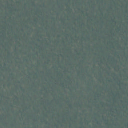

In [19]:
filename = 'train_0.jpg'
# load image
photo = load_img(folder + 'train_0.jpg', target_size=(128,128))
photo

In [20]:
photo = img_to_array(photo, dtype='uint8')
photo

array([[[ 92, 109, 100],
        [ 96, 112, 103],
        [103, 114, 108],
        ...,
        [ 88, 105, 101],
        [ 95, 110, 102],
        [ 94, 108, 103]],

       [[ 90, 106, 100],
        [ 93, 109, 103],
        [ 99, 113, 107],
        ...,
        [ 90, 105, 101],
        [ 90, 106, 100],
        [ 89, 107, 101]],

       [[ 93, 108, 104],
        [ 94, 108, 103],
        [ 94, 111, 102],
        ...,
        [ 92, 111, 104],
        [ 86, 107, 101],
        [ 87, 107,  98]],

       ...,

       [[ 93, 112, 105],
        [ 96, 113, 105],
        [ 96, 112, 105],
        ...,
        [ 81, 104, 100],
        [ 87, 107, 104],
        [ 80,  99,  98]],

       [[ 94, 111, 107],
        [ 95, 112, 107],
        [ 98, 114, 108],
        ...,
        [ 85, 108, 100],
        [ 90, 110, 106],
        [ 82, 103, 102]],

       [[ 96, 108, 105],
        [ 93, 109, 104],
        [ 97, 111, 106],
        ...,
        [ 92, 108, 102],
        [ 94, 110, 104],
        [ 83, 102,  98]]

In [21]:
filename

'train_0.jpg'

In [22]:
filename[:-4]

'train_0'

In [23]:
encoding = zeros(17, dtype='uint8')

In [24]:
encoding

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

In [25]:
def one_hot_encode(tags, mapping):
    # create empty vector
    encoding = zeros(len(mapping), dtype='uint8')
    # mark 1 for each tag in the vector
    for tag in tags:
        encoding[mapping[tag]] = 1
    return encoding

In [26]:
tags = file_mapping[filename[:-4]]

In [27]:
tags

['haze', 'primary']

In [28]:
labels_map

{'agriculture': 0,
 'artisinal_mine': 1,
 'bare_ground': 2,
 'blooming': 3,
 'blow_down': 4,
 'clear': 5,
 'cloudy': 6,
 'conventional_mine': 7,
 'cultivation': 8,
 'habitation': 9,
 'haze': 10,
 'partly_cloudy': 11,
 'primary': 12,
 'road': 13,
 'selective_logging': 14,
 'slash_burn': 15,
 'water': 16}

In [29]:
target = one_hot_encode(tags, labels_map)

In [30]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0], dtype=uint8)

In [31]:
photos, targets = list(), list()

In [32]:
for filename in listdir(folder):
    # load image
    photo = load_img(folder + filename, target_size=(128,128))
    # convert to numpy array
    photo = img_to_array(photo, dtype='uint8')
    # get tags
    tags = file_mapping[filename[:-4]]
    # one hot encode tags
    target = one_hot_encode(tags, labels_map)
    # store
    photos.append(photo)
    targets.append(target)

KeyboardInterrupt: 

In [33]:
X = asarray(photos, dtype='uint8')
y = asarray(targets, dtype='uint8')

In [39]:
y

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 0, 1, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1]], dtype=uint8)

In [34]:
X

array([[[[ 92, 109, 100],
         [ 96, 112, 103],
         [103, 114, 108],
         ...,
         [ 88, 105, 101],
         [ 95, 110, 102],
         [ 94, 108, 103]],

        [[ 90, 106, 100],
         [ 93, 109, 103],
         [ 99, 113, 107],
         ...,
         [ 90, 105, 101],
         [ 90, 106, 100],
         [ 89, 107, 101]],

        [[ 93, 108, 104],
         [ 94, 108, 103],
         [ 94, 111, 102],
         ...,
         [ 92, 111, 104],
         [ 86, 107, 101],
         [ 87, 107,  98]],

        ...,

        [[ 93, 112, 105],
         [ 96, 113, 105],
         [ 96, 112, 105],
         ...,
         [ 81, 104, 100],
         [ 87, 107, 104],
         [ 80,  99,  98]],

        [[ 94, 111, 107],
         [ 95, 112, 107],
         [ 98, 114, 108],
         ...,
         [ 85, 108, 100],
         [ 90, 110, 106],
         [ 82, 103, 102]],

        [[ 96, 108, 105],
         [ 93, 109, 104],
         [ 97, 111, 106],
         ...,
         [ 92, 108, 102],
        

In [74]:
#savez_compressed('planet_data.npz', X, y)

In [33]:
from numpy import load
data = load('planet_data.npz')

In [34]:
X, y = data['arr_0'], data['arr_1']
print('Loaded: ', X.shape, y.shape)

Loaded:  (40479, 128, 128, 3) (40479, 17)


In [35]:
len(X)

40479

In [36]:
len(photos)

6434

In [40]:

# compare f-beta score between sklearn and keras
from numpy import load
from numpy import asarray
from sklearn.model_selection import train_test_split
from sklearn.metrics import fbeta_score
from keras import backend


#create fbeta metric to use in training the model
# calculate fbeta score for multi-class/label classification
def fbeta(y_true, y_pred, beta=2):
    # clip predictions
    y_pred = backend.clip(y_pred, 0, 1)
    # calculate elements
    tp = backend.sum(backend.round(backend.clip(y_true * y_pred, 0, 1)), axis=1)
    fp = backend.sum(backend.round(backend.clip(y_pred - y_true, 0, 1)), axis=1)
    fn = backend.sum(backend.round(backend.clip(y_true - y_pred, 0, 1)), axis=1)
    # calculate precision
    p = tp / (tp + fp + backend.epsilon())
    # calculate recall
    r = tp / (tp + fn + backend.epsilon())
    # calculate fbeta, averaged across each class
    bb = beta ** 2
    fbeta_score = backend.mean((1 + bb) * (p * r) / (bb * p + r + backend.epsilon()))
    return fbeta_score



In [42]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from sklearn.metrics import fbeta_score
from keras.layers import Flatten
from keras.optimizers import SGD

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(128, 128, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))

In [43]:
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(17, activation='sigmoid'))

In [44]:
opt = SGD(lr=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=[fbeta])

In [40]:
trainX, testX, trainY, testY = train_test_split(X, y, test_size=0.3, random_state=1)

In [41]:
datagen = ImageDataGenerator(rescale=1.0/255.0)

In [42]:
train_it = datagen.flow(trainX, trainY, batch_size=128)
test_it = datagen.flow(testX, testY, batch_size=128)

In [43]:
# fit model
history = model.fit_generator(train_it, steps_per_epoch=len(train_it),validation_data=test_it, validation_steps=len(test_it), epochs=20, verbose=2)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
222/222 - 2517s - loss: 0.2381 - fbeta: 0.6460 - val_loss: 0.2149 - val_fbeta: 0.6654
Epoch 2/20
222/222 - 2495s - loss: 0.2087 - fbeta: 0.6923 - val_loss: 0.2019 - val_fbeta: 0.6983
Epoch 3/20
222/222 - 2573s - loss: 0.1993 - fbeta: 0.7197 - val_loss: 0.1939 - val_fbeta: 0.7422
Epoch 4/20
222/222 - 2570s - loss: 0.1907 - fbeta: 0.7385 - val_loss: 0.1834 - val_fbeta: 0.7428
Epoch 5/20
222/222 - 2538s - loss: 0.1835 - fbeta: 0.7515 - val_loss: 0.1805 - val_fbeta: 0.7522
Epoch 6/20
222/222 - 2540s - loss: 0.1766 - fbeta: 0.7640 - val_loss: 0.1726 - val_fbeta: 0.7565
Epoch 7/20
222/222 - 3150s - loss: 0.1697 - fbeta: 0.7734 - val_loss: 0.1676 - val_fbeta: 0.7822
Epoch 8/20
222/222 - 2492s - loss: 0.1636 - fbeta: 0.7850 - val_loss: 0.1631 - val_fbeta: 0.7935
Epoch 9/20
222/222 - 2481s - loss: 0.1572 - fbeta: 0.7934 - val_loss: 0.1575 - val_fbeta: 0.7867
Epoch 10/20
222/222 - 2316s - loss: 0.1523 - fbeta:

In [45]:
#saving the model
import os.path
if os.path.isfile('models/planet_model.h5') is False:
    model.save('models/planet_model.h5')

In [46]:
#setting dependencie to use the fbeta metric while loading the saved model
dependencies = {
     'fbeta': fbeta
}
#model = keras.models.load_model(model_file, custom_objects=dependencies)

In [47]:
#loading the model
from tensorflow.keras.models import load_model
model = load_model('models/planet_model.h5', custom_objects=dependencies)

In [48]:
#printing the weights of the model
model.get_weights()

[array([[[[ 2.63027817e-01,  2.97147185e-01,  2.99574345e-01,
            3.45913738e-01,  3.51615578e-01, -1.97768614e-01,
           -1.54892907e-01, -3.58550459e-01, -1.98998660e-01,
            3.87855738e-01, -2.19528198e-01,  4.03070062e-01,
            5.04702270e-01, -3.34865928e-01, -2.54572302e-01,
            3.98225278e-01,  4.52700146e-02,  8.58462695e-03,
            2.34113738e-01, -2.50937164e-01, -9.90941562e-03,
            2.78065711e-01, -5.11496782e-01,  4.03983593e-01,
            4.78549302e-01,  1.93595514e-01, -2.76548769e-02,
           -3.73306304e-01,  2.42928326e-01, -1.08281679e-01,
           -1.69067413e-01, -3.96134593e-02],
          [-1.88634381e-01, -9.89135131e-02, -1.11819766e-01,
            2.51635969e-01, -3.96690875e-01,  2.79444754e-01,
            1.43052945e-02, -1.72579452e-01,  2.08473563e-01,
           -4.10183400e-01,  3.84724885e-01,  4.71040793e-02,
           -9.49147437e-03,  4.38974828e-01,  1.99453026e-01,
           -1.17534153e-

In [49]:
#function to prepare the image for prediction
def load_image(filename):
    # load the image
    img = load_img(filename, target_size=(128, 128))
    # convert to array
    img = img_to_array(img)
    # reshape into a single sample with 3 channels
    img = img.reshape(1, 128, 128, 3)
    # center pixel data
    img = img.astype('float32')
    img = img - [123.68, 116.779, 103.939]
    return img

In [50]:
tst = 'planet/train-jpg/train_4554.jpg'

In [51]:
img = load_image(tst)

In [52]:
result = model.predict(img)

In [53]:
result

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
        0.]], dtype=float32)

In [54]:
result.round()

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
        0.]], dtype=float32)

In [55]:
def run_example(inv_mapping):
    # load the image
    img = load_image(tst)
    # load model
    # predict the class
    result = model.predict(img)
    print(result[0])
    # map prediction to tags
    tags = prediction_to_tags(inv_mapping, result[0])
    print(tags)

In [56]:
def prediction_to_tags(inv_mapping, prediction):
    # round probabilities to {0, 1}
    values = prediction.round()
    # collect all predicted tags
    tags = [inv_mapping[i] for i in range(len(values)) if values[i] == 1.0]
    return tags

In [57]:
def create_tag_mapping(mapping_csv):
    # create a set of all known tags
    labels = set()
    for i in range(len(mapping_csv)):
        # convert spaced separated tags into an array of tags
        tags = mapping_csv['tags'][i].split(' ')
        # add tags to the set of known labels
        labels.update(tags)
    # convert set of labels to a list to list
    labels = list(labels)
    # order set alphabetically
    labels.sort()
    # dict that maps labels to integers, and the reverse
    labels_map = {labels[i]:i for i in range(len(labels))}
    inv_labels_map = {i:labels[i] for i in range(len(labels))}
    return labels_map, inv_labels_map

In [58]:
_, inv_mapping = create_tag_mapping(df)

In [59]:
run_example(inv_mapping)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0.]
['partly_cloudy', 'primary']


In [60]:
inv_mapping

{0: 'agriculture',
 1: 'artisinal_mine',
 2: 'bare_ground',
 3: 'blooming',
 4: 'blow_down',
 5: 'clear',
 6: 'cloudy',
 7: 'conventional_mine',
 8: 'cultivation',
 9: 'habitation',
 10: 'haze',
 11: 'partly_cloudy',
 12: 'primary',
 13: 'road',
 14: 'selective_logging',
 15: 'slash_burn',
 16: 'water'}

In [141]:
predictions = []

In [146]:
len(listdir('planet/test-jpg/'))

40669

In [147]:
listdir('planet/test-jpg/')[1]

'test_1.jpg'

In [148]:
" ".join(['partly_cloudy', 'primary'])

'partly_cloudy primary'

In [152]:
#making predictions for every image in the test set,converting them to tags and appending the predictions in an array
for i in range(len(listdir('planet/test-jpg/'))):
    img = load_image('planet/test-jpg/' + listdir('planet/test-jpg/')[i])
    pred = model.predict(img)
    tags = prediction_to_tags(inv_mapping, pred[0])
    predictions.append(" ".join(tags))

In [156]:
safe = predictions

In [165]:
" ".join(predictions[0])

'clear primary'

In [167]:
dft = pd.DataFrame()

In [168]:
dft['ty'] = safe

In [181]:
dft.head(325)

,ty
0,"[clear, primary]"
1,"[clear, primary]"
2,"[partly_cloudy, primary]"
3,"[clear, primary, water]"
4,"[artisinal_mine, clear, primary, water]"
...,...
320,"[clear, primary]"
321,"[partly_cloudy, primary, water]"
322,clear primary
323,clear primary


In [187]:
type([4,4,4]) == list

True

In [195]:
dft['tags'] = dft['ty']

In [199]:
dft.drop('ty',axis =1,inplace=True)
dft.head(2)

,tags
0,"[clear, primary]"
1,"[clear, primary]"


In [203]:
dft.iloc[2]['tags'] = " ".join(dft.iloc[2]['tags'])

In [204]:
dft.iloc[2]['tags']

'partly_cloudy primary'

In [205]:
#some tags(about 322) were not converted to strings, so i used a loop to do that
for i in range(322):
    if(type(dft.iloc[i]['tags']) == list):
        dft.iloc[i]['tags'] = " ".join(dft.iloc[i]['tags'])

In [210]:
listdir('planet/test-jpg/')

['test_0.jpg',
 'test_1.jpg',
 'test_10.jpg',
 'test_100.jpg',
 'test_1000.jpg',
 'test_10000.jpg',
 'test_10001.jpg',
 'test_10002.jpg',
 'test_10003.jpg',
 'test_10004.jpg',
 'test_10005.jpg',
 'test_10006.jpg',
 'test_10007.jpg',
 'test_10008.jpg',
 'test_10009.jpg',
 'test_1001.jpg',
 'test_10010.jpg',
 'test_10011.jpg',
 'test_10012.jpg',
 'test_10013.jpg',
 'test_10014.jpg',
 'test_10015.jpg',
 'test_10016.jpg',
 'test_10017.jpg',
 'test_10018.jpg',
 'test_10019.jpg',
 'test_1002.jpg',
 'test_10020.jpg',
 'test_10021.jpg',
 'test_10022.jpg',
 'test_10023.jpg',
 'test_10024.jpg',
 'test_10025.jpg',
 'test_10026.jpg',
 'test_10027.jpg',
 'test_10028.jpg',
 'test_10029.jpg',
 'test_1003.jpg',
 'test_10030.jpg',
 'test_10031.jpg',
 'test_10032.jpg',
 'test_10033.jpg',
 'test_10034.jpg',
 'test_10035.jpg',
 'test_10036.jpg',
 'test_10037.jpg',
 'test_10038.jpg',
 'test_10039.jpg',
 'test_1004.jpg',
 'test_10040.jpg',
 'test_10041.jpg',
 'test_10042.jpg',
 'test_10043.jpg',
 'test_1004

In [216]:
len(safe)

40991

In [191]:
dft.to_csv('planetpredictions.csv',index=False)

In [77]:
dft = pd.read_csv('planetpredictions.csv')

In [78]:
dft

,ty
0,"['clear', 'primary']"
1,"['clear', 'primary']"
2,"['partly_cloudy', 'primary']"
3,"['clear', 'primary', 'water']"
4,"['artisinal_mine', 'clear', 'primary', 'water']"
...,...
40986,clear primary
40987,partly_cloudy primary
40988,clear partly_cloudy primary
40989,clear primary


In [79]:
draft = dft.head(322)

In [80]:
draft.head(20)

,ty
0,"['clear', 'primary']"
1,"['clear', 'primary']"
2,"['partly_cloudy', 'primary']"
3,"['clear', 'primary', 'water']"
4,"['artisinal_mine', 'clear', 'primary', 'water']"
5,"['clear', 'primary']"
6,"['partly_cloudy', 'primary']"
7,"['clear', 'conventional_mine', 'habitation', '..."
8,"['partly_cloudy', 'primary', 'water']"
9,"['clear', 'primary']"


In [81]:
#it turns out the 322 tags were repetitions of the next 322 tags so we do away with them. 
dft = dft.iloc[322:]

In [84]:
#resetting the index so it starts from 0 again
dft = dft.reset_index(drop=True)

In [85]:
#now the rows are correctly 40669
dft

,ty
0,clear primary
1,clear primary
2,partly_cloudy primary
3,clear primary water
4,artisinal_mine clear primary water
...,...
40664,clear primary
40665,partly_cloudy primary
40666,clear partly_cloudy primary
40667,clear primary


In [86]:
#getting the image names for the directory and adding it to the dataframe
dft['image_name'] = listdir('planet/test-jpg/')

In [87]:
dft

,ty,image_name
0,clear primary,test_0.jpg
1,clear primary,test_1.jpg
2,partly_cloudy primary,test_10.jpg
3,clear primary water,test_100.jpg
4,artisinal_mine clear primary water,test_1000.jpg
...,...,...
40664,clear primary,test_9995.jpg
40665,partly_cloudy primary,test_9996.jpg
40666,clear partly_cloudy primary,test_9997.jpg
40667,clear primary,test_9998.jpg


In [88]:
dft['tags'] = dft['ty']

In [91]:
dft.drop('ty',axis=1,inplace = True)

In [92]:
dft

,image_name,tags
0,test_0.jpg,clear primary
1,test_1.jpg,clear primary
2,test_10.jpg,partly_cloudy primary
3,test_100.jpg,clear primary water
4,test_1000.jpg,artisinal_mine clear primary water
...,...,...
40664,test_9995.jpg,clear primary
40665,test_9996.jpg,partly_cloudy primary
40666,test_9997.jpg,clear partly_cloudy primary
40667,test_9998.jpg,clear primary


In [95]:
#creating an array to store the additional test images predictions
predictions_additional =[]

In [97]:
#predicting for all the images and storing it an the array
for i in range(len(listdir('planet/test-jpg-additional/'))):
    img = load_image('planet/test-jpg-additional/' + listdir('planet/test-jpg-additional/')[i])
    pred = model.predict(img)
    tags = prediction_to_tags(inv_mapping, pred[0])
    predictions_additional.append(" ".join(tags))

In [94]:
listdir('planet/test-jpg-additional/')

['file_0.jpg',
 'file_1.jpg',
 'file_10.jpg',
 'file_100.jpg',
 'file_1000.jpg',
 'file_10000.jpg',
 'file_10001.jpg',
 'file_10002.jpg',
 'file_10003.jpg',
 'file_10004.jpg',
 'file_10005.jpg',
 'file_10006.jpg',
 'file_10007.jpg',
 'file_10008.jpg',
 'file_10009.jpg',
 'file_1001.jpg',
 'file_10010.jpg',
 'file_10011.jpg',
 'file_10012.jpg',
 'file_10013.jpg',
 'file_10014.jpg',
 'file_10015.jpg',
 'file_10016.jpg',
 'file_10017.jpg',
 'file_10018.jpg',
 'file_10019.jpg',
 'file_1002.jpg',
 'file_10020.jpg',
 'file_10021.jpg',
 'file_10022.jpg',
 'file_10023.jpg',
 'file_10024.jpg',
 'file_10025.jpg',
 'file_10026.jpg',
 'file_10027.jpg',
 'file_10028.jpg',
 'file_10029.jpg',
 'file_1003.jpg',
 'file_10030.jpg',
 'file_10031.jpg',
 'file_10032.jpg',
 'file_10033.jpg',
 'file_10034.jpg',
 'file_10035.jpg',
 'file_10036.jpg',
 'file_10037.jpg',
 'file_10038.jpg',
 'file_10039.jpg',
 'file_1004.jpg',
 'file_10040.jpg',
 'file_10041.jpg',
 'file_10042.jpg',
 'file_10043.jpg',
 'file_1004

In [98]:
predictions_additional

['clear primary',
 'clear primary water',
 '',
 'clear primary',
 'clear primary',
 'clear primary',
 'habitation primary water',
 'clear primary',
 'partly_cloudy primary',
 'partly_cloudy primary',
 'clear primary',
 'clear primary',
 'agriculture partly_cloudy primary',
 'partly_cloudy primary',
 'clear conventional_mine habitation primary road water',
 'artisinal_mine clear primary water',
 'partly_cloudy primary',
 'artisinal_mine clear habitation primary road water',
 'clear primary',
 'clear primary',
 'clear primary water',
 'clear primary',
 'agriculture partly_cloudy primary',
 'clear primary',
 'clear primary',
 '',
 'clear primary',
 'clear primary',
 'clear primary',
 'clear primary',
 'cloudy',
 'clear primary',
 'clear partly_cloudy primary',
 'clear primary',
 'partly_cloudy primary',
 'clear primary',
 'partly_cloudy primary',
 'clear primary',
 'clear primary',
 'partly_cloudy primary water',
 'clear primary',
 'clear primary',
 'clear primary',
 'artisinal_mine clear

In [104]:
dft2 = pd.DataFrame()
dft2['image_name'] = listdir('planet/test-jpg-additional/')
dft2['tags'] = predictions_additional
dft2[dft2['tags']=='']

,image_name,tags
2,file_10.jpg,
25,file_10019.jpg,
52,file_10043.jpg,
63,file_10053.jpg,
172,file_10151.jpg,
...,...,...
20312,file_981.jpg,
20364,file_9857.jpg,
20394,file_9884.jpg,
20422,file_9909.jpg,


In [118]:
tst = 'planet/test-jpg-additional/file_981.jpg'

In [119]:
#run_example(inv_mapping)

In [122]:
img = load_image(tst)
model.predict(img).round()

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.]], dtype=float32)

In [132]:
dft2 = dft2.reset_index(drop=True)

In [133]:
dft2

,image_name,tags
0,file_0.jpg,clear primary
1,file_1.jpg,clear primary water
2,file_10.jpg,
3,file_100.jpg,clear primary
4,file_1000.jpg,clear primary
...,...,...
20517,file_9995.jpg,partly_cloudy primary
20518,file_9996.jpg,clear primary water
20519,file_9997.jpg,clear primary
20520,file_9998.jpg,


In [126]:
dft2

,image_name,tags
0,file_0.jpg,clear primary
1,file_1.jpg,clear primary water
2,file_10.jpg,
3,file_100.jpg,clear primary
4,file_1000.jpg,clear primary
...,...,...
20517,file_9995.jpg,partly_cloudy primary
20518,file_9996.jpg,clear primary water
20519,file_9997.jpg,clear primary
20520,file_9998.jpg,


In [136]:
#concatenating the two predictions and resetting the index
submission = pd.concat([dft,dft2]).reset_index(drop=True)

In [137]:
submission

,image_name,tags
0,test_0.jpg,clear primary
1,test_1.jpg,clear primary
2,test_10.jpg,partly_cloudy primary
3,test_100.jpg,clear primary water
4,test_1000.jpg,artisinal_mine clear primary water
...,...,...
61186,file_9995.jpg,partly_cloudy primary
61187,file_9996.jpg,clear primary water
61188,file_9997.jpg,clear primary
61189,file_9998.jpg,


In [141]:
#importing os and making a new directory to store submissions
import os
os.makedirs('submissions')

In [142]:
submission['image_name']

0           test_0.jpg
1           test_1.jpg
2          test_10.jpg
3         test_100.jpg
4        test_1000.jpg
             ...      
61186    file_9995.jpg
61187    file_9996.jpg
61188    file_9997.jpg
61189    file_9998.jpg
61190    file_9999.jpg
Name: image_name, Length: 61191, dtype: object

In [156]:
#removing the '.jpg' from all the image_names to fit the format of the sample submissions
for i in range(len(submission)):
    if(submission.iloc[i]['image_name'][-3:] == 'jpg'):
        submission.iloc[i]['image_name'] = submission.iloc[i]['image_name'][:-4]

In [157]:
submission

,image_name,tags
0,test_0,clear primary
1,test_1,clear primary
2,test_10,partly_cloudy primary
3,test_100,clear primary water
4,test_1000,artisinal_mine clear primary water
...,...,...
61186,file_9995,partly_cloudy primary
61187,file_9996,clear primary water
61188,file_9997,clear primary
61189,file_9998,


In [158]:
#converting the submission to a csv file for submission
submission.to_csv('submissions/planet_submission.csv',index=False)